In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('medical_examination.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [12]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
df['height'] = df['height'] / 100

In [14]:
df['overweight'] = ((df['weight'] / (df['height'] ** 2)) > 25).astype(int)

In [15]:
df['cholesterol'] = df.apply(lambda x : 0 if x['cholesterol'] == 1 else 1, axis=1).astype(int)
df['gluc'] = df.apply(lambda x : 0 if x['gluc'] == 1 else 1, axis=1).astype(int)

In [16]:
df_cat = pd.melt(df, id_vars='cardio', value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [52]:
cardio_0 = df_cat.loc[df_cat['cardio'] == 0].value_counts().unstack()
cardio_1 = df_cat.loc[df_cat['cardio'] == 0].value_counts().unstack()

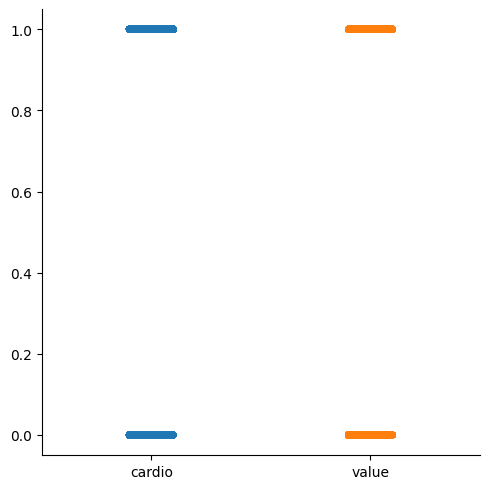

In [75]:
sns.catplot(df_cat)